In [1]:
import einsteinpy as esp
import sympy as sy
from sympy import simplify as simp
from sympy import tensorcontraction as tc
from sympy import tensorproduct as tp
from sympy import diff as d
from sympy import Array
from einsteinpy.symbolic import MetricTensor
sy.init_printing()
import numpy as np

In [2]:
t,x,y, z = sy.symbols('t x y z')
a =sy.Function('a')(t)
syms=[t,x,y,z]

In [3]:
arr=Array([[1,0,0,0],[0,a,0,0],[0,0,a,0],[0,0,0,a]])
arrinv=Array([[1,0,0,0],[0,1/a,0,0],[0,0,1/a,0],[0,0,0,1/a]])
arrm=Array([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [4]:
minkll=esp.symbolic.metric.MetricTensor(arrm,syms,'ll','mink')
eUl=esp.symbolic.tensor.BaseRelativityTensor(arr,syms=syms, config='ul')
eLu=esp.symbolic.tensor.BaseRelativityTensor(arrinv,syms=syms, config='lu')
e=a**3
garr=tc(tc(tp(minkll.tensor(),eUl.tensor(),eUl.tensor()),(0,2)),(0,2))
gll=esp.symbolic.metric.MetricTensor(garr,syms,'ll','g')

In [21]:
eUl.tensor(), eLu.tensor()

⎛                       ⎡1   0     0     0  ⎤⎞
⎜                       ⎢                   ⎥⎟
⎜                       ⎢    1              ⎥⎟
⎜⎡1   0     0     0  ⎤  ⎢0  ────   0     0  ⎥⎟
⎜⎢                   ⎥  ⎢   a(t)            ⎥⎟
⎜⎢0  a(t)   0     0  ⎥  ⎢                   ⎥⎟
⎜⎢                   ⎥, ⎢          1        ⎥⎟
⎜⎢0   0    a(t)   0  ⎥  ⎢0   0    ────   0  ⎥⎟
⎜⎢                   ⎥  ⎢         a(t)      ⎥⎟
⎜⎣0   0     0    a(t)⎦  ⎢                   ⎥⎟
⎜                       ⎢                1  ⎥⎟
⎜                       ⎢0   0     0    ────⎥⎟
⎝                       ⎣               a(t)⎦⎠

In [8]:
guu=gll.change_config('uu')
minkuu=minkll.change_config('uu')

In [9]:
TUll=sy.MutableDenseNDimArray([[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]])

In [10]:
for i, I in enumerate(syms):
    for j, J in enumerate(syms):
        for k, K in enumerate(syms):
            
            TUll[i,j,k]=d(eUl.tensor()[i,k],J)-d(eUl.tensor()[i,j],K)

In [11]:
Tull=tc(tp(eLu.tensor(),TUll),(0,2))
Tull

⎡              ⎡            d             ⎤  ⎡               d          ⎤  ⎡  
⎢              ⎢            ──(a(t))      ⎥  ⎢               ──(a(t))   ⎥  ⎢  
⎢              ⎢            dt            ⎥  ⎢               dt         ⎥  ⎢  
⎢              ⎢    0       ────────  0  0⎥  ⎢    0       0  ────────  0⎥  ⎢  
⎢⎡0  0  0  0⎤  ⎢              a(t)        ⎥  ⎢                 a(t)     ⎥  ⎢  
⎢⎢          ⎥  ⎢                          ⎥  ⎢                          ⎥  ⎢  
⎢⎢0  0  0  0⎥  ⎢ d                        ⎥  ⎢    0       0     0      0⎥  ⎢  
⎢⎢          ⎥  ⎢-──(a(t))                 ⎥  ⎢                          ⎥  ⎢  
⎢⎢0  0  0  0⎥  ⎢ dt                       ⎥  ⎢ d                        ⎥  ⎢  
⎢⎢          ⎥  ⎢──────────     0      0  0⎥  ⎢-──(a(t))                 ⎥  ⎢  
⎢⎣0  0  0  0⎦  ⎢   a(t)                   ⎥  ⎢ dt                       ⎥  ⎢ d
⎢              ⎢                          ⎥  ⎢──────────  0     0      0⎥  ⎢-─
⎢              ⎢    0          0      0  0⎥  ⎢   a(t

In [12]:
Tl=tc(Tull,(0,1))
Tu=tc(tp(guu.tensor(),Tl),(0,2))


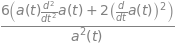

In [13]:
Bl=(sy.zeros(4))
for i, I in enumerate(syms):
    defff=e*Tu[i]
    diffme=d(defff,I)
    Bl[i]=2*diffme/e
B=sum(Bl)
B.simplify()

In [14]:
Tlll=tc(tp(gll.tensor(),Tull),(0,2))
Tuuu=sy.MutableDenseNDimArray([[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]])
Tulu=sy.MutableDenseNDimArray([[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]])

In [15]:
for i, I in enumerate(syms):
    for j, J in enumerate(syms):
        for k, K in enumerate(syms):
            Tulu[i,j,k]=guu.tensor()[k,k]*Tull[i,j,k]

In [16]:
for i, I in enumerate(syms):
    for j, J in enumerate(syms):
        for k, K in enumerate(syms):
            Tuuu[i,j,k]=guu.tensor()[j,j]*Tulu[i,j,k]

In [17]:
Tl=tc(Tull,(0,1))
Tu=tc(Tulu,(0,1))

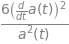

In [18]:
T=tc(tc(tc(tp(Tuuu,Tlll),(0,3)),(0,2)),(0,1))/4+tc(tc(tc(tp(Tuuu,Tlll),(2,3)),(1,2)),(0,1))/2-tc(tp(Tl,Tu),(0,1))
T.simplify()

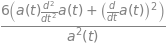

In [20]:
R=B-T
R.simplify()